In [1]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                   
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
import os

In [2]:
fList = [fn for fn in os.listdir() if fn.find('TransSpecData')!=-1]
ff = np.loadtxt(fList[0])[:, 0]
NRIN = np.zeros((len(ff), len(fList)))
SRIN = np.zeros((len(ff), len(fList)))
for ii, fn in enumerate(fList):
    with open(fn, 'r') as f:
        DCVals = f.readline()
        NDC = float(DCVals.split(' ')[4])
        SDC = float(DCVals.split(' ')[-2])
    data = np.loadtxt(fn)
    NRIN[:, ii] = data[:, 1]/NDC
    SRIN[:, ii] = data[:, 2]/SDC
NRINmed = np.median(NRIN, axis=1)
NRINlb = np.percentile(NRIN, 15.865, axis=1,)
NRINub = np.percentile(NRIN, 84.135, axis=1,)
SRINmed = np.median(SRIN, axis=1)
SRINlb = np.percentile(SRIN, 15.865, axis=1,)
SRINub = np.percentile(SRIN, 84.135, axis=1,)

Text(0, 0.5, 'RIN [$1/\\sqrt{Hz}$]')

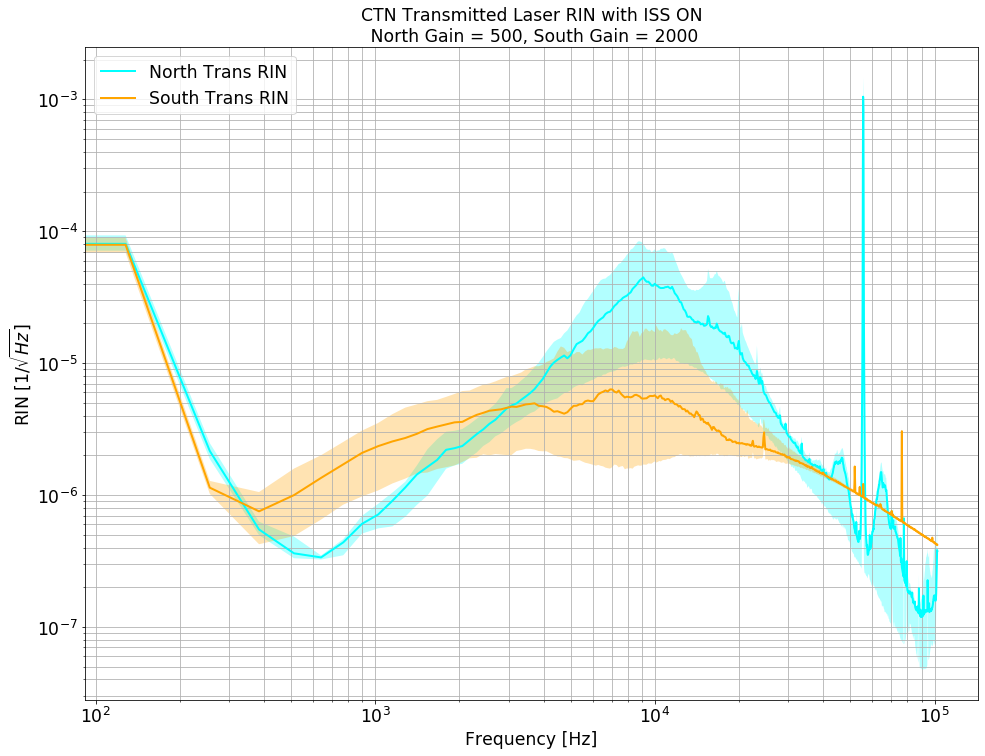

In [3]:
fig = plt.figure(figsize=[16, 12])
ax = fig.gca()
ax.loglog(ff, NRINmed, label='North Trans RIN', color='cyan')
ax.loglog(ff, SRINmed, label='South Trans RIN', color='orange')
ax.fill_between(ff, NRINlb, NRINub, color='cyan', alpha='0.3', lw=0)
ax.fill_between(ff, SRINlb, SRINub, color='orange', alpha='0.3', lw=0)
ax.legend()
ax.grid('on', which='both')
ax.set_title('CTN Transmitted Laser RIN with ISS ON\n North Gain = 500, South Gain = 2000')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('RIN [$1/\sqrt{Hz}$]')

In [4]:
plt.savefig('RIN_measurement.pdf',
            bbox_inches='tight')

<Figure size 432x288 with 0 Axes>